# Final Project
#### By: Joseph Wong, Ruben Regalado, Rory Huck

## How do non-academic factors influence students academic success?

### Introduction:
#### Our analysis brings together 3 different data sets with 3 different population scopes that will help us answer the question of how non-academic factors influence students academic success. In the first section of our anaylsis we look at a data set with information about different countires and what percentage of their population has differing types of education levels. Looking at this can be really helpful when considering what country to get your education in. This data is extremely interesting as it begins to ask many more questions about weather economic status of countries effects the overall education attainment level. We paired this data with a smaller scope of just college students and how their personal enviorments effect their GPA's. For example factors such as sleep, exercise, and anxiety can have a multitude of effects on a students scores. When talking about indivual students sucess and how their enviorment effects them we can also take in to consideration their parents. How much education do their parents have and does this effect the students test scores. Combining 3 different data sets across 3 different scales opens up a broad umbrella for analysis and anserwing questions about students sucess when influenced by outside factors. 

### Loading in the data

#### Joseph

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'



# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
file_name = 'MentalHealthSurvey.csv'
DF_raw = pd.read_csv(file_name)

**Data Source**

I got my data from kaggle.com on a dataset labelled "Student Mental Health Survey: Online Survey on the Mental Health of IT Student" by Abdullah Ashfaq. A free account on Kaggle is required to download the dataset, but is publically viewable online. It was last updated 3 months ago. The data was gathered through an online survey and responses where anonymized to keep confidentiality. A possible ethical concern is that only IT students were given the opportunity to take the survey, meaning many groups, such as college students with other majors, are unrepresented by the dataset. The data explores the students' demographic data (while keeping their anonymity), lifestyle, experiences, university campus, self-reported mental health levels, and coping mechanisms.
We will use cumulative GPA as an indicator of student success, as it is a reflection of their dedication and performance to their courses.

**Variable Definitions**
* **'sports_engagement':** monthly sports engagement
* **'depression':** self-reported feeling of depression (1-5)
* **'anxiety':** self-reported feeling of anxiety (1-5)
* **'isolation':** self-reported feeling of isolation (1-5)
* **'future_insecurity':** self-reported feeling of future insecurity (1-5)

**Data Scope**

There are 4 different majors included in the dataset, all of which are related to Information Technology. The most frequent is Data Science, followed by Computer Science, then Information Technology, and finally Software Engineering.

The dataset mostly represents to male and female undergraduate students (moreso male) ages 18-22 majoring in an Information Technology field universities in Pakistan. Based on this representation, it can be applied to other undergraduate students with caution, taking into consideration geographical and cultural differences between Pakistan and other countries that may influence outcomes.

#### Ruben

In [121]:
file_name = 'StudentsPerformance.csv'
DF_ruben = pd.read_csv(file_name)

**Data Source**

I got my data from Kaggle.com from a dataset named 'Students Performance in Exams' by Jakki Seshapanpu. This data comes from a site where the data is allowed to be used for data explorations, all that is needed to access the data is a Kaggle account. This data was gathered from various students which included their total scores, the score breakdown and indvidiual aspects of the studnets daily life before the exam was taken.

**Variable Definitions**
* **Gender:** This is a categoral varible that tells us the gender of the observed student
* **Race/Ethnicity:** This is also a categorical varialbe that tells us what race group the student is in, however we dont know which race correlates to each letter.
* **Parental level of eduacation:** Categorical variable that tells us their parent(s) highest level of education
* **lunch:** Categorical variable that tells us whether or not the student had lunch before taking the exam
* **test preperation course:** Categorical variable that tells us if the student took a test preperation course prior to the exam
* **math score:** Numerical variable that tells us the students math score
* **reading score:** Numerical variable that tells us the studnets reading score
* **writing score:** Numerical variable that tells us the studnets writing score

#### Rory

In [5]:
df_rory = pd.read_csv('OECD.csv')

**NOTES:**

-All data is refering to both males and females from the ages of 25 to 64 in the year 2023

-Educational attainment refers to the highest level of education completed by a person, shown as a percentage of all persons in that age group. Below upper secondary education includes early childhood education, primary education or lower secondary education. Programmes at the lower secondary education level are designed to lay the foundation across a wide range of subjects. Programmes at the upper secondary level are more specialised and offer students more choices and diverse pathways for completing their secondary education. Tertiary education includes short-cycle tertiary education, bachelor’s, master’s, or doctoral or equivalent levels.
#### Initial Exploratory Data Analysis
#### Definition of all variables (or explanation for why you are not considering some variables)
##### - Variables I am considering in this anlyis: Reference Area = the name of the country the data was taken from, Educational attainment level = The level of education completed broken off into 3 seperate categories(Below upper secondary education,Upper secondary or post-secondary non-tertiary, and Tertiary education), Place of birth = wether or not the data is refering to someone who was born in that country or wether they are foriegn born, and the observational value = the percentage of the population that has completed that educational attainment level. 
#### Descriptive statistics for the data set, counts of the variables, value counts (frequency tables) for each categorical variable of interest.
##### -This data frame is looking at 36 countries total. These countries are being looked at with 3 variables. We can see from grouping the data by the educational attainment level that most of the countries have a mean educational attinment level between upper seconday or post secondary education and tertiary education, this means most of the countries in this data set have a majoriety of their people attaining education secondary or higher. 
#### Plots that help a reader understand your data.
##### I made a histogram that is seperated by the educational attainment level and then colored by country so you can see which countries have the largest amount of their population having a tertiatry education compared to which countires have lower educational attianment levles. We can see that the United Kingdom and Austraillia have some of the highest percentage of their population with a tertiary education and costa rica and mexico with the majoriey of their population in with lower than secondary education. I did anoter histogram with facets seperating by the 3 levels of educational attainment and then colored by birthplace and we can see that the most higher educated people slightly tend to be forigen born and that native born people slighlty tend to be less educated. This is probably due to some outside confounding variables, but i am not sure just off of this one histogram.
#### Initial analysis to answer initial data questions.
##### Off of a very surface level analysis I can answer my two questions with not tons of certainatiy, but the attainment level for higher education does tend to be higher for those who are forgien born vs those who are native born and I am not quite sure why this but I am assuming this has to do with better educational oppertunties being avalible in other countires so there is a larger migration population to those said countries. We can also see that more first world countires such as the United Kingdom and Australia had higher percentages of their population in the tertiary educational attainment level and lower economic status countries such as costa rica and mexico that had the majoriety of their population in the below secondary educational attainment level.
- This data was collected by The OECD Network on labour market, economic and social outcomes of learning (LSO Network) compiles the data from the national Labour Force Surveys (LFS) for on educational attainment. This data was collected using an electronic serveying system. The OECD has an entire readaly avalible pdf outlining why all of their data is collected ethically. In this PDF they state that eletronic serveys are avalible even in countires where electronics are not and they do take in some meta data from countires, but this data is thoroughly combed over by the OECD before being used or published.


-LINK: https://data-explorer.oecd.org/vislc=en&fs[0]=Topic%2C0%7CEducation%20and%20skills%23EDU%23&fs[1]=Topic%2C1%7CEducation%20and%20skills%23EDU%23%7CEducation%20attainment%23EDU_ATT%23&pg=0&fc=Topic&snb=4&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_EAG_LSO_EA%40DF_LSO_NEAC_DISTR_EA_MIGR&df[ag]=OECD.EDU.IMEP&df[vs]=1.0&dq=._T.Y25T64.ISCED11A_0T2%2BISCED11A_3_4%2BISCED11A_5T8....NB%2BFB._Z%2B_T.....OBS...A3&lom=LASTNOBSERVATIONS&lo=1&pd=2020%2C2023&to[TIME_PERIOD]=true&lb=nm
Citation:

OECD (2024) Education at a Glance 2024 Sources, Methodologies and Technical Notes, OECD Publishing Paris,

https://doi.org/10.1787/e7d20315-en.

### Analysis

#### Rory

In [6]:
my_columns = ['TIME_PERIOD','Reference area','Educational attainment level','Place of birth','OBS_VALUE']
df_rory[my_columns].sort_values('Reference area')
DF_rory=df_rory[my_columns].sort_values('Reference area')

In [7]:
DF_rory

,TIME_PERIOD,Reference area,Educational attainment level,Place of birth,OBS_VALUE
60,2023,Australia,Below upper secondary education,Native-born,15.439816
144,2023,Australia,Upper secondary or post-secondary non-tertiary...,Foreign-born,24.160263
162,2023,Australia,Below upper secondary education,Foreign-born,8.643244
87,2023,Australia,Tertiary education,Native-born,45.790474
188,2023,Australia,Tertiary education,Foreign-born,67.196495
...,...,...,...,...,...
104,2023,United States,Below upper secondary education,Native-born,4.824945
141,2023,United States,Tertiary education,Native-born,52.194115
146,2023,United States,Upper secondary or post-secondary non-tertiary...,Foreign-born,34.675747
210,2023,United States,Upper secondary or post-secondary non-tertiary...,Native-born,42.980942


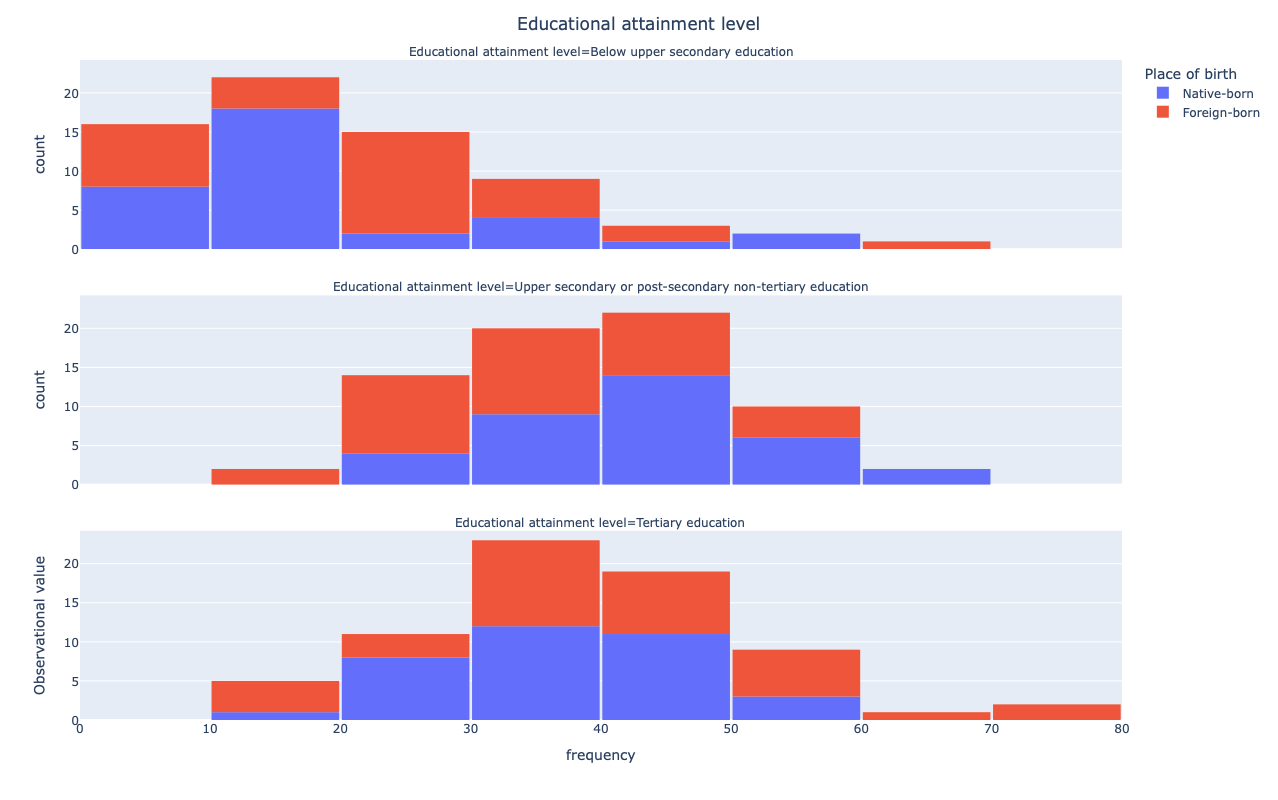

In [130]:
fig = px.histogram(DF_rory,
                 x='OBS_VALUE',
                 nbins=10,
                 facet_col= 'Educational attainment level',
                 facet_col_wrap=1,
                  color='Place of birth')

fig.update_layout(bargap=0.02,
                  title='Educational attainment level',
                  title_x=0.5,
                  xaxis_title="frequency",
                  yaxis_title="Observational value",
                  autosize=False,
                  width=1000,
                  height=800)

fig.show()

In [131]:
mask = DF_rory['Educational attainment level'] == 'Tertiary education'
DF_rory_T = DF_rory[mask].copy()

In [132]:
mask = DF_rory['Educational attainment level'] == 'Upper secondary or post-secondary non-tertiary education'
DF_rory_S = DF_rory[mask].copy()

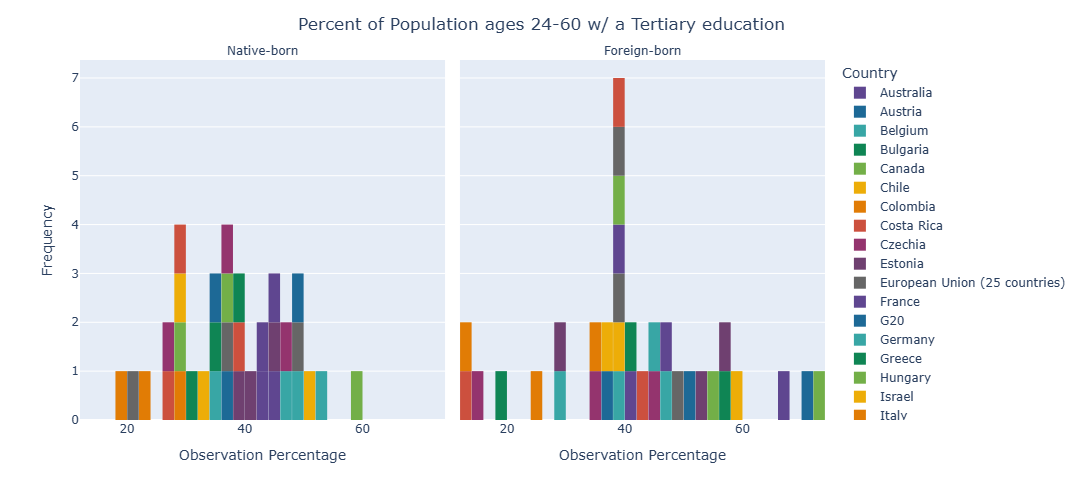

In [133]:
fig = px.histogram(DF_rory_T,
                 x='OBS_VALUE',
                 nbins=30,
                 facet_col= 'Place of birth',
                 facet_col_wrap=2,
                  color='Reference area',
                  color_discrete_sequence=px.colors.qualitative.Prism,
                  category_orders={'origin' : ["Native-Born","Foreign-Born"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text='Observation Percentage')
fig.update_layout(bargap=0.02,
                  title='Percent of Population ages 24-60 w/ a Tertiary education',
                  title_x=0.5,
                  xaxis_title="Observation Percentage",
                  yaxis_title="Frequency",
                  legend_title="Country",
                  autosize=False,
                  width=1200,
                  height=500)

fig.show()

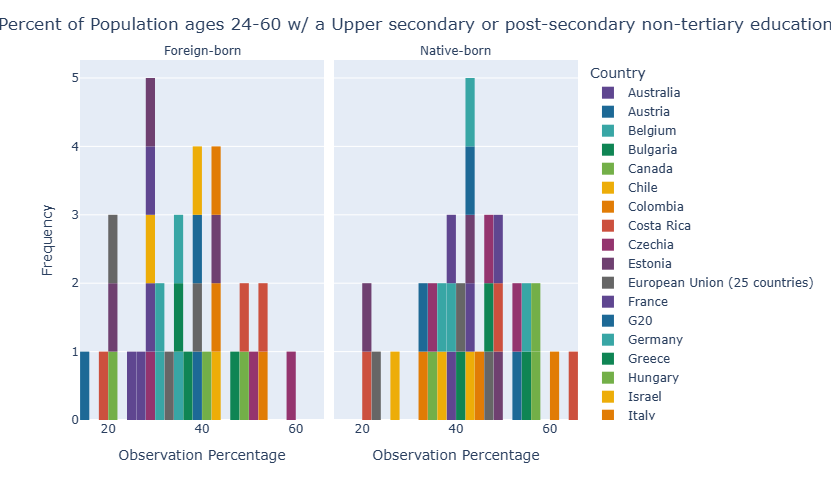

In [134]:
fig = px.histogram(DF_rory_S,
                 x='OBS_VALUE',
                 nbins=30,
                 facet_col= 'Place of birth',
                 facet_col_wrap=2,
                  color='Reference area',
                  color_discrete_sequence=px.colors.qualitative.Prism)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text='Observation Percentage')
fig.update_layout(bargap=0.02,
                  title='Percent of Population ages 24-60 w/ a Upper secondary or post-secondary non-tertiary education',
                  title_x=0.5,
                  xaxis_title="Observation Percentage",
                  yaxis_title="Frequency",
                  legend_title="Country",
                  autosize=False,
                  width=1200,
                  height=500)

fig.show()

In conclusion, the country with the highest percentage of their population with a Tertiary education for both native born and forgien born indivuals is Canada. The countries with the highest percentange of the population with a a Upper secondary or post-secondary non-tertiary education are Solvakia Republic native born and Slovania forgien born. The countries with the highest percent of their population with a Below upper secondary education are Costa rica forgien born and mexico native born.

#### Joseph

In [137]:
my_cols = ['cgpa','sports_engagement','average_sleep','depression','anxiety','isolation','future_insecurity']
DF_j = DF_raw[my_cols]
DF_j['mental_health'] = 20 - (DF_j['depression'] + DF_j['anxiety'] + DF_j['isolation'] + DF_j['future_insecurity'])

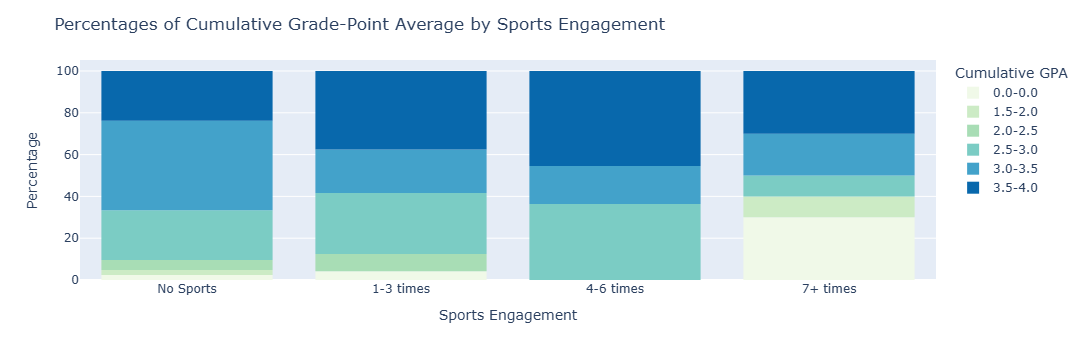

In [138]:
fig = px.histogram(DF_j.sort_values(by='cgpa'),
                   x='sports_engagement',
                   color='cgpa',
                   color_discrete_sequence=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#43a2ca','#0868ac'],
                   barnorm='percent',
                   category_orders={'sports_engagement' : ['No Sports','1-3 times','4-6 times','7+ times']})
fig.update_layout(title="Percentages of Cumulative Grade-Point Average by Sports Engagement",
                  xaxis_title='Sports Engagement',
                  yaxis_title='Percentage',
                  legend_title='Cumulative GPA')
fig.show()

There is a possible relationship between the amount of monthly sport engagement and cumulative GPA. It appears that a high frequency of sport engagement correlates to a greater probability of a worse GPA. Observations that reported no monthly sport engagement had the greatest percentage of GPAs of 3.0+. It appears that the percentage of very high (3.5-4.0) GPAs increases as sports engagement increases, reaching a peak when monthly sports engagement is 4-6 times. However, the pattern ends at this peak, and decreases for very high frequencies of sport engagement.

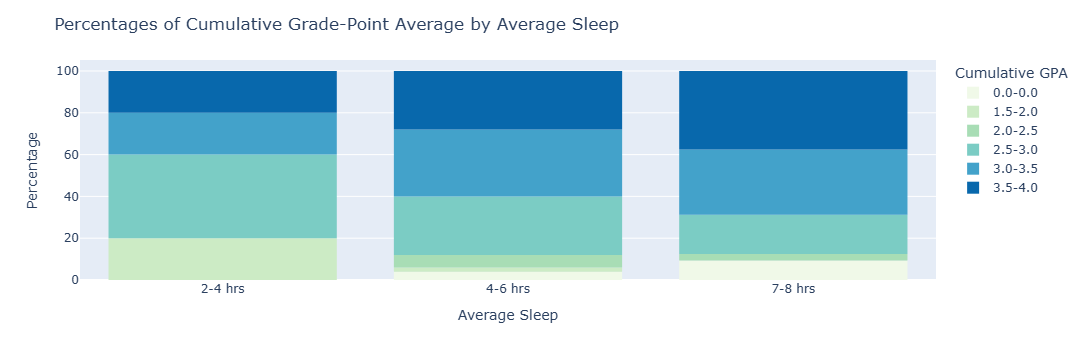

In [140]:
fig = px.histogram(DF_j.sort_values(by='cgpa'),
                   x='average_sleep',
                   color='cgpa',
                   color_discrete_sequence=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#43a2ca','#0868ac'],
                   barnorm='percent',
                   category_orders={'average_sleep' : ['2-4 hrs','4-6 hrs','7-8 hrs']})
fig.update_layout(title="Percentages of Cumulative Grade-Point Average by Average Sleep",
                  xaxis_title='Average Sleep',
                  yaxis_title='Percentage',
                  legend_title='Cumulative GPA')
fig.show()

There is a possible association between amount of sleep and cumulative GPA. Observations with greater amounts of average sleep tend to have higher frequencies of better GPAs. Frequency of high GPAs (3.0+) increase and the frequency of moderate to low GPAs (3.0-) decrease as amount of sleep increases.

#### Ruben

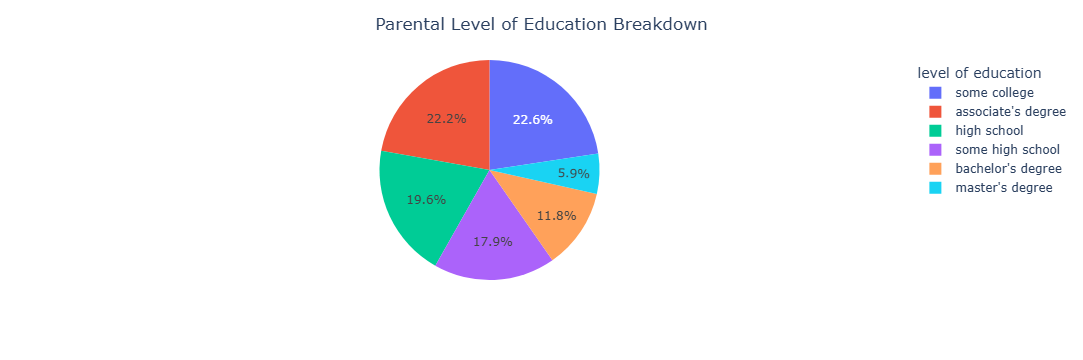

In [161]:
fig = px.pie(DF_ruben,
             names='parental level of education')
fig.update_layout(title=" Parental Level of Education Breakdown",
                  title_x=0.5,
                  legend_title="level of education")
fig.show()

In this we can see that the majority of the parents have some sort of college education but as the level of degree rises, their margins shrink. This is very imporant as we will use this variable as a focal point in the data exploration

In [164]:
order =  ["some high school","high school", "some college", "associate's degree","bachelor's degree","master's degree"]
DF_ruben['total score'] = DF_ruben['reading score'] + DF_ruben['writing score'] + DF_ruben['writing score']

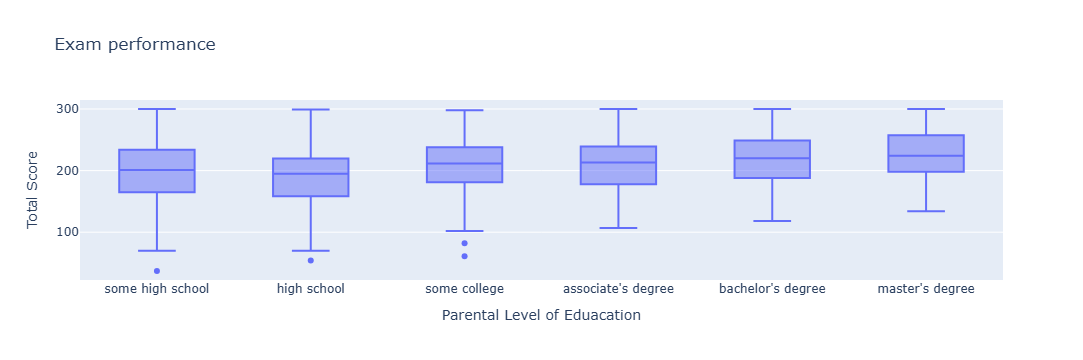

In [166]:
fig = px.box(
    DF_ruben,
    x='parental level of education',  
    y='total score',  
    title='Exam performance')

fig.update_layout(
    xaxis_title='Parental Level of Eduacation',
                  yaxis_title='Total Score',
    xaxis=dict(
        categoryorder="array",
        categoryarray=order))

fig.show()

As shown in the bar graph we can see that while the parents level of education doesnt limit the potential to score high on the exam, there is a steady increase in the minimum score for the students in each education level and that the mean score does tend to rise as the parents level of education increases. Considering this information, we can infer that as the parental level of education of each students rises, the student has a higher chance of recieving a higher overall score on their exam

## In conclusion, country of residence, amount of sleep, frequency of exercise, and parental education are all factors that are associated with students' academic success.